# Primer Examen Parcial
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247

### Pregunta 1

El archivo "P1 Datos1.csv" contiene 500 observaciones de un estudio en que se trata de relacionar la cantidad de horas de estudio dedicadas por parcial, con la calificación obtenida en dicho periodo. Se te ha pedido que realices un estudio de inferencia y uno de predicción. Para el estudio de inferecia, crea un modelo de regresión lineal simple utilizando todos los datos disponibles y trabaja los siguientes puntos:
* Explica la metodología utilizada, asegúrate de describir mínimo la ecuación que describe al modelo, la métrica de error usada para optimizar los coeficientes, y el método de optimización utilizado.
* A partir del modelo generado, describe el comportamiento de la población de forma detallada, asegurándote de usar lenguaje estadístico adecuado.
* Si imprimes el p-value del coeficiente beta1 y lo comparas con el p-value del estadístico F, son iguales. ¿A qué crees que se debe esto?

Para el estudio de predicción, no necesitas programar nada adicional (pero puedes hacerlo si así lo deseas). Solamente responde las siguientes preguntas:
* Si fueras a programar este experimento, indica claramente qué líneas de código tendrías que incluir (descríbelas en palabras simples y de forma general). Además de lo que agregarías, ¿modificarías algo del código usado para el estudio de inferencia?, en caso afirmativo, detalla qué y por qué.
* ¿Qué métrica o métricas usarías para indicar la calidad/precisión del modelo?, ¿por qué?
* Basándote solamente en los datos (visualización) y el estudio de inferencia, ¿consideras que una metodología no lineal podría generar una mejor predicción?, en caso afirmativo, ¿de qué tipo y por qué?


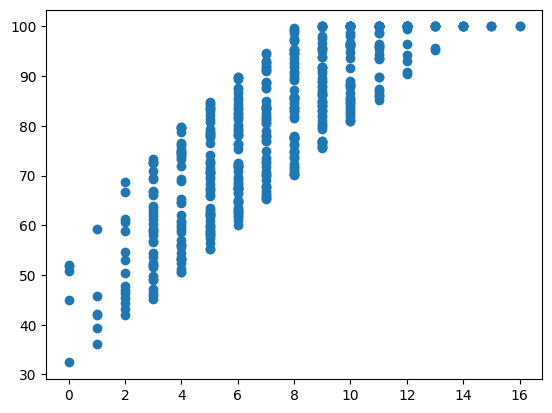

                            OLS Regression Results                            
Dep. Variable:           Calificacion   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1171.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          7.56e-133
Time:                        12:52:23   Log-Likelihood:                -1781.4
No. Observations:                 500   AIC:                             3567.
Df Residuals:                     498   BIC:                             3575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.0701      0.969     49.602      0.0

C:\Users\kikin\AppData\Local\Temp\ipykernel_25752\2902602789.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val_beta1 = var1.pvalues[1]


In [6]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
datos1=ps.read_csv('P1_Datos1.csv')
xdatos1=datos1.Horas
ydatos1=datos1.Calificacion
plt.scatter(xdatos1, ydatos1)
plt.show()
xData1= sm.add_constant(xdatos1)
modelo1=sm.OLS(ydatos1, xData1)
var1=modelo1.fit()
resumen1=var1.summary()
print(resumen1)
def compute_cost(x, y, w, b): #Código obtenido mediante Coursera (Se realizaron algunos cambio con ayuda de ChatGPt)
    m=x.shape[0]
    f_wb=np.dot(x, w)+b
    cost=(f_wb - y)**2
    total_cost = (1 / (2 * m)) * np.sum(cost)  
    return total_cost
xNp1=np.array(xdatos1)
yNp1=np.array(ydatos1)
coste=compute_cost(xNp1, yNp1, 4.2576, 48.0701)
print(coste)
#Codigo hecho por ChatGPt
p_val_beta1 = var1.pvalues[1]
p_val_F = var1.f_pvalue
print(f"P-value de Beta1: {p_val_beta1}\tP-value del estadístico F: {p_val_F}")

* Para la optimización de los coeficientes yo usaría la **Cost function**, ya que esta nos permitiría saber que tan bueno es nuestro modelo lineal eso cuando queremos saber la tendencia de nuestro modelo, pero si lo que queremos hacer es una predicción entonces lo que se puede hacer es comparar los datos de prueba, es decir ver que tan distinto fueron los resultados de prueba con nuestro modelo, al igual esto se puede ver mediante la $R^2$ (Esto también aplica para lo anterior), la cual entre más cerca este del uno quiere decir que mejor adaptado esta nuestro modelo a nuestros datos.
* Acorde a nuestro modelo la calificación por no estudiar nada seria entre 46.166 a 49.974, y esta iria aumentando dependiendo de cuantas horas de estudio le dedicara el estudiante, por cada hora la calificación aumentaba entre 4.013 y 4.502 puntos, esto hasta llegar al 100 de calificación, según lo observado y suponiendo que la calificación más alta que se puede dar es de 100.
* Son iguales ya que unicamente contamos con una variable y ademas estamos en una regresión lineal, en caso de ser otro modelo los valores seria distinto

* Con este código se puede obtener muy buena información para este caso, ya que nos muestra el p-value de nuestro modelo el cual esta dentro del intervalo de confianza (típicamente < 0.05) y como el estadístico F es alto entonces nuestro modelo es significativo, en caso de que tuviera que añadir algo seria el RSE ya que este nos permite ver que tanto varia nuestro modelo a comparación de lo real.
* Usaría la $R^2$ y ls RSE, ya que nos permitiría conocer que tanta variación tiene nuestro modelo con los datos que se tienen, es decir que para nuestro caso la $R^2=0.702$ por lo que aproximadamente para el 70.2% de nuestros datos el modelo se ajusta bien, en cambio el RSE nos indicaría que tanto varían los resultados calculados por el modelo con los reales.
* Para estos datos usaría una función segmentada, debido a que se puede visualizar en los datos que después de ciertas horas se llega aun tope (100), por lo que la segmentada permitiría hacer esto.

### Pregunta 2

Estás trabajando en un proyecto enfocado en caracterizar el precio de una casa con base en distintas variables. En el archivo "P1 Datos2.csv" encontrarás 50 observaciones con la siguiente información:
* ft2. Tamaño de la casa en pies cuadrados.
* m2. Tamaño de la casa en metros cuadrados.
* fibra. Si se tiene acceso a internet de fibra óptica en esa colonia (1 = no, 2 = sí)
* banos. Cantidad de baños que tiene la casa.
* precio. Precio de la casa (MXN).

No necesitas programar, pero puedes hacerlo si te ayuda; puedes utilizar Excel o alguna otra herramienta si simplemente quieres visualizar los datos. Contesta las siguientes preguntas:
* La base de datos tiene algunos huecos. Revisa cuántos y dónde se encuentran; indica claramente cómo resolverías este problema.
* La base de datos tiene un valor atípico (fila 37 en Python). Explica en palabras sencillas cómo es que normalmente se detectan este tipo de valores, e indica en este caso qué harías con dicho valor y por qué.
* Indica qué variables son categóricas y qué variables son cuantitativas. Si alguna variable necesita modificarse o reemplazarse antes de generar un modelo de regresión lineal múltiple, indica cuál, por qué, y qué modificación realizarías.
* Un análisis de correlación de Pearson generó la tabla que se muestra abajo. Genera conclusiones a partir de dicha tabla, indicando claramente si esos resultados te motivan a realizar alguna modificación a la base de datos.
* Un miembro del equipo decidió realizar una regresión lineal múltiple con solo dos de las variables del sistema para facilitar la interpretación del modelo. Comenta sobre la calidad del modelo, enfocándote en una o varias de las métricas que allí se muestran y explicando si te parece necesario conocer alguna métrica que allí no aparece. Independientemente de si el modelo es bueno o no (asume por un momento que el modelo tiene la mejor calidad del mundo), explica de forma clara y concisa lo que los coeficientes del modelo sugieren; es decir, explica en palabras sencillas lo que el modelo permite inferir.

In [7]:
datos2=ps.read_csv('P1_Datos2.csv')
datos2=datos2.drop(columns=['banos', 'ft2'])
datos2=datos2.dropna()
q1=datos2.m2.quantile(0.25)
q3=datos2.m2.quantile(0.75)
riq=q3-q1
limA=q1-(3*riq)
limB=q3+(3*riq)
datos2=datos2[(datos2.m2>=limA)&(datos2.m2<=limB)]
datos2['fibra']=datos2['fibra']//2
datos2.head(5)

,m2,fibra,precio
0,118.079764,0,2708852.241
2,9.476110,0,5894434.775
3,76.737911,1,6840156.707
4,103.772696,0,5211677.257
5,63.266970,1,3320981.627


* Con ayuda de la extension de Visual Code **Data Wrangler** se puede hacer limpiar de mejor manera los datos, lo que me permitio ver que en la columna **banos** hay muchos datos faltantes, por lo que deseche esa columna **ft2**, porque es lo mismo que **m2** unicamnete cambia el sistema de unidades y tambien se desechó la columna , y de ahi se eliminaron los datos vacíos.
* Se uso el metodo de tukey para eliminar ese valor atípico en **m2**, el cual pudo ser avistado gracias a la extension previamente mencionada
* la variable **fibra** es categorica entre 1 y 2 para hacerla dummie se uso la divisón entera de 2 de tal forma  que el 1 pasa a 0 y el 2 a 1. 
* Viendo el resumen de los datos se puede ver que el modelo no se ajusta a los datos por lo que desecharía el modelo
* Segun la situción que se presenta yo usaria el numero de habitaciones, los pisos de la casa y la zona de la misma para determinar el precio.

### Pregunta 3
Se obtuvieron datos de 50 variables distintas (X1 a X50) y una salida (y); están almacenados en el archivo "P1 Datos3.csv". Se sabe que mucha de la información recolectada probablemente no sea de utilidad, por lo que se desea realizar un proceso de selección de características. En clase se describió la metodología de selección hacia adelante, hacia atrás y de selección rápida hacia adelante. Si tu fueras a diseñar una metodología basada en esos conceptos, que lleve por nombre selección rápida hacia atrás, ¿qué proceso llevarías a cabo? Descríbelo de forma detallada en estilo de pseudocódigo. Finalmente, indica si crees que esta metodología generaría la misma solución que la selección hacia adelante rápida, y por qué.

Usaria el de crear varios modelos en los que unicamente descarte 1 variable y me quedo con los 3 mejores basandome en la validando me de la R-ajustada y usando validación cruzada y de ahi repito lo mismo hasta que la R-Ajustada empiece a disminuir (Me quedaria con el modelo de mayor R-Ajustada).

### Pregunta 4

Genera (inventa) un conjunto de datos (1 variable de entrada y 1 una variable de salida) con al menos 20 observaciones, para los que consideres que se debería utilizar un método paramétrico lineal si es que se desea realizar un análisis de predicción. Visualiza los datos usando una gráfica de dispersión (scatter plot) y explica por qué aseguras que para ese conjunto de datos, un método paramétrico lineal sería el más adecuado. Describe qué método en particular usarías y por qué.

Realiza un proceso similar, pero para un conjunto de datos para el que consideres que se debería utilizar un método paramétrico no lineal. De forma similar, visualiza los datos y explica por qué aseguras que se debería utilizar un método paramétrico no lineal. Describe qué método en particular usarías y por qué.

Finalmente, indica cómo crees que se comportaría (y por qué) un modelo de KNN, si se generaran predicciones con él, en vez de usar un método paramétrico lineal y uno paramétrico no lineal, respectivamente (puedes crear los modelos y basar tus conclusiones en los resultados obtenidos).

### Pregunta 5

Un equipo de consultoría le reporta lo siguiente a una empresa de ventas de alimentos:

Hay una asociación significativa entre la temperatura del día y la cantidad de piezas de pan vendido, y por cada grado de temperatura que baja, se puede esperar un aumento promedio de 100 piezas vendidas.
Generamos un modelo que puede predecir con un RSS de 10.15 la cantidad de piezas de pan que se venderán en la próxima semana.
En la población menor de 35 años se tiene una clara tendencia a la compra de bebidad energizantes, mientras que en la población mayor a 35 años no se encuentra dicha tendencia.
Determina:

Para generar cada una de las tres conclusiones previas, ¿el equipo de consultoría utilizó un método supervisado, uno no supervisado, ambos, algún otro, o no podemos saberlo? Explica por qué lo afirmas en cada caso.
Para generar cada una de las tres conclusiones previas, ¿el equipo de consultoría atacó un problema de regresión, de clasificación, ambos, algún otro, o no podemos saberlo? Explica por qué lo afirmas en cada caso.
Para generar cada una de las tres conclusiones previas, ¿el equipo de consultoría utilizó un método paramétrico, uno no paramétricos, ambos, algún otro, o no podemos saberlo? Explica por qué lo afirmas en cada caso.
Para cada una de las tres conclusiones, ¿qué métrica o información adicional (específica) le pedirías al equipo de consultoría para comprender mejor los resultados o asegurar que cuentas con información precisa?